In [2]:
with open("../data/aquired/acquired_transcripts_all.txt", "r") as f:
    text = f.read()

words = text.split()
print(f"Total words in all transcripts: {len(words)}")

Total words in all transcripts: 3476259


<BarContainer object of 200 artists>

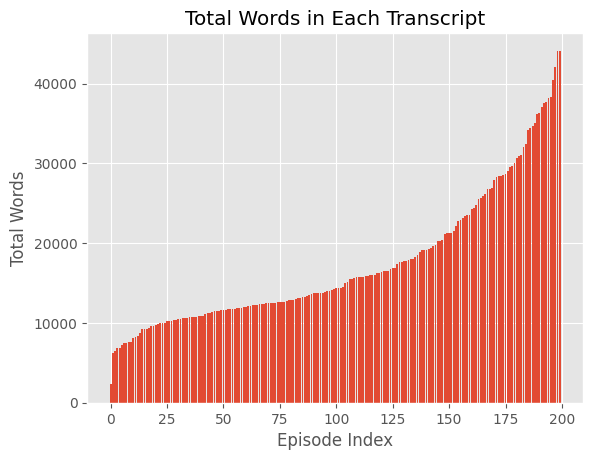

In [3]:
import os

total_words = []

for dirname, _, filenames in os.walk('../data/aquired/acquired-individual-transcripts'):
    for filename in filenames:
        with open(os.path.join(dirname, filename), "r", encoding="utf-8") as f:

            # print(f"Reading {filename}")
            text = f.read()
            words = text.split()
            # print(len(words))
            # if len(words) == 25:
            # print(f"One word in {filename} {words}")
            #print(f"Total words in {filename}: {len(words)}")
            total_words.append(len(words))

# plot the total words in each transcript
import matplotlib.pyplot as plt

# sort the total words
total_words.sort()

# plot the total words bar chart
# x-axis is the index of the episode, y-axis is the total words in the episode
# add title and labels
# use seaborn style
plt.style.use('ggplot')
plt.title("Total Words in Each Transcript")
plt.xlabel("Episode Index")
plt.ylabel("Total Words")
plt.bar(range(len(total_words)), total_words)

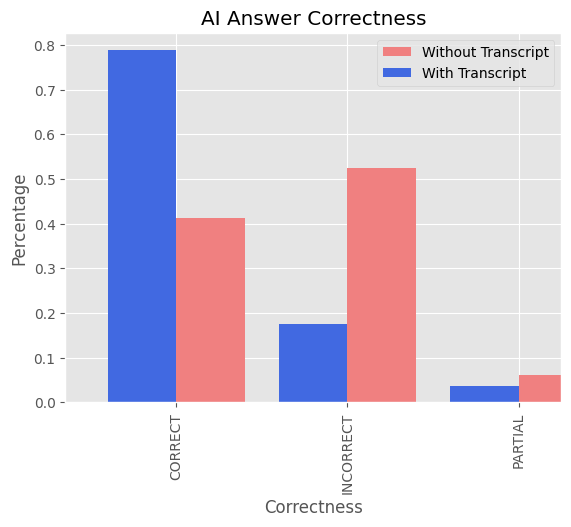

In [4]:
import pandas as pd
df = pd.read_csv('../data/aquired/acquired-qa-evaluation.csv', encoding='unicode_escape')

plt.style.use('ggplot')
plt.title("AI Answer Correctness")
plt.xlabel("Correctness")
plt.ylabel("Percentage")

df.ai_answer_without_transcript_correctness.value_counts(normalize=True).sort_index().plot(kind='bar', color='lightcoral', position=0, width=0.4, label='Without Transcript')
df.ai_answer_with_the_transcript_correctness.value_counts(normalize=True).sort_index().plot(kind='bar', color='royalblue', position=1, width=0.4, label='With Transcript')
plt.title("AI Answer Correctness")
plt.xlabel("Correctness")
plt.ylabel("Percentage")
plt.legend()

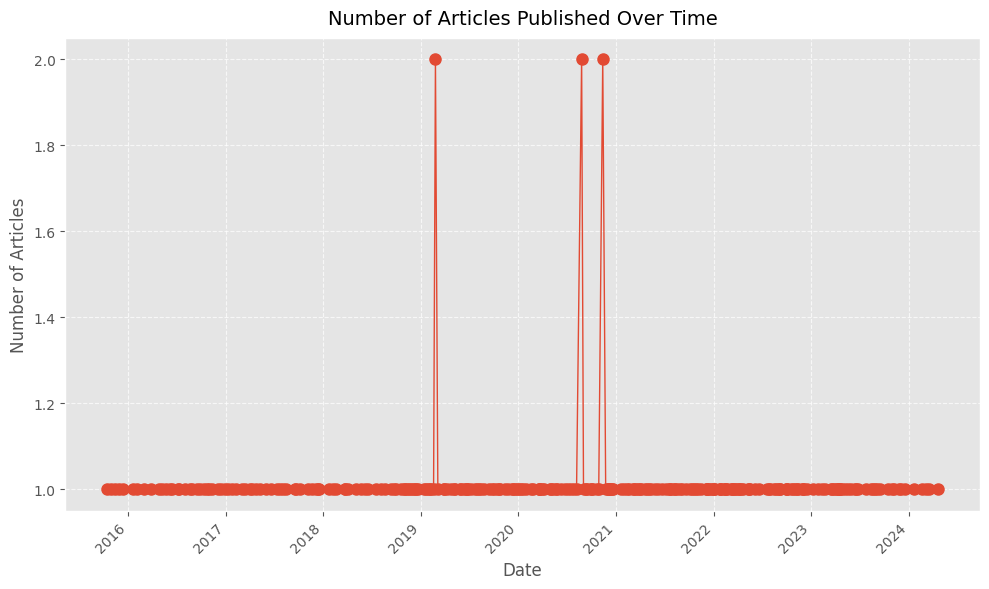

In [5]:
# Convert 'date' column to datetime

df = pd.read_csv('../data/aquired/acquired_metadata.csv', encoding='unicode_escape')

# Convert blog_date to datetime and handle invalid dates
df['blog_date'] = pd.to_datetime(df['blog_date'], errors='coerce')
df = df.dropna(subset=['blog_date'])  # Remove rows with invalid dates

# Count the number of articles per date
article_counts = df['blog_date'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(article_counts.index, article_counts.values, marker='o', linestyle='-', linewidth=1, markersize=8)
plt.title('Number of Articles Published Over Time', fontsize=14, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()